In [30]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
#all data of stocks facebook, amazon, apple, netflix and google extracted from Bloomberg Terminal
fb = pd.read_csv(r'C:\Users\lokes\OneDrive\Desktop\bloomberg_project\fb_stock_price.csv')

In [12]:
fb['Date'] =pd.to_datetime(fb.Date)
fb = fb.sort_values('Date') 

In [13]:
fb = fb.reset_index(drop=True)

In [14]:
#start date is 01-02-2018 and end date is 05-14-2021
fb

,Date,FB
0,2018-01-02,181.42
1,2018-01-03,184.67
2,2018-01-04,184.33
3,2018-01-05,186.85
4,2018-01-08,188.28
...,...,...
843,2021-05-10,305.97
844,2021-05-11,306.53
845,2021-05-12,302.55
846,2021-05-13,305.26


In [15]:
amzn = pd.read_csv(r'C:\Users\lokes\OneDrive\Desktop\bloomberg_project\amazon_stock_price.csv')

In [17]:
amzn['Date'] =pd.to_datetime(amzn.Date)
amzn = amzn.sort_values('Date') 
amzn = amzn.reset_index(drop=True)
amzn

,Date,AMZN
0,2018-01-02,1189.01
1,2018-01-03,1204.20
2,2018-01-04,1209.59
3,2018-01-05,1229.14
4,2018-01-08,1246.87
...,...,...
843,2021-05-10,3190.49
844,2021-05-11,3223.91
845,2021-05-12,3151.94
846,2021-05-13,3161.47


In [21]:
aapl = pd.read_csv(r'C:\Users\lokes\OneDrive\Desktop\bloomberg_project\apple_stock_price.csv')

In [22]:
aapl['Date'] =pd.to_datetime(aapl.Date)
aapl = aapl.sort_values('Date') 
aapl = aapl.reset_index(drop=True)
aapl

,Date,AAPL
0,2018-01-02,43.065
1,2018-01-03,43.058
2,2018-01-04,43.258
3,2018-01-05,43.750
4,2018-01-08,43.588
...,...,...
843,2021-05-10,126.850
844,2021-05-11,125.910
845,2021-05-12,122.770
846,2021-05-13,124.970


In [23]:
nflx = pd.read_csv(r'C:\Users\lokes\OneDrive\Desktop\bloomberg_project\netflix_stock_price.csv')

In [24]:
nflx['Date'] =pd.to_datetime(nflx.Date)
nflx = nflx.sort_values('Date') 
nflx = nflx.reset_index(drop=True)
nflx

,Date,NFLX
0,2018-01-02,201.07
1,2018-01-03,205.05
2,2018-01-04,205.63
3,2018-01-05,209.99
4,2018-01-08,212.05
...,...,...
843,2021-05-10,486.69
844,2021-05-11,495.08
845,2021-05-12,484.98
846,2021-05-13,486.66


In [25]:
goog = pd.read_csv(r'C:\Users\lokes\OneDrive\Desktop\bloomberg_project\google_stock_price.csv')

In [26]:
goog['Date'] =pd.to_datetime(goog.Date)
goog = goog.sort_values('Date') 
goog = goog.reset_index(drop=True)
goog

,Date,GOOG
0,2018-01-02,1065.00
1,2018-01-03,1082.48
2,2018-01-04,1086.40
3,2018-01-05,1102.23
4,2018-01-08,1106.94
...,...,...
843,2021-05-10,2341.66
844,2021-05-11,2308.76
845,2021-05-12,2239.08
846,2021-05-13,2261.97


In [27]:
from functools import reduce



In [28]:
#merging all the data of FAANG
my_stocks = reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [fb, amzn, aapl, nflx, goog])

In [29]:
my_stocks

,Date,FB,AMZN,AAPL,NFLX,GOOG
0,2018-01-02,181.42,1189.01,43.065,201.07,1065.00
1,2018-01-03,184.67,1204.20,43.058,205.05,1082.48
2,2018-01-04,184.33,1209.59,43.258,205.63,1086.40
3,2018-01-05,186.85,1229.14,43.750,209.99,1102.23
4,2018-01-08,188.28,1246.87,43.588,212.05,1106.94
...,...,...,...,...,...,...
843,2021-05-10,305.97,3190.49,126.850,486.69,2341.66
844,2021-05-11,306.53,3223.91,125.910,495.08,2308.76
845,2021-05-12,302.55,3151.94,122.770,484.98,2239.08
846,2021-05-13,305.26,3161.47,124.970,486.66,2261.97


In [34]:
stockStartDate = '2018-01-02'
today = '2021-05-14'
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
numAssets = len(stockSymbols) 

In [35]:
title = 'Portfolio Stocks Price History'

In [50]:
# Create a function to visualize the stock/portfolio
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Stock'):
  
  # Create the title 
    title = 'Portfolio ' + col + ' Price History'
  
  # Visualize the price history
    plt.figure(figsize=(12.2,4.5)) 
  # Loop through each stock and plot the Adj Close for each day
    for c in my_stocks.columns.values:
        plt.plot( my_stocks[c],  label=c)
  
    plt.title(title)
    plt.xlabel('Date',fontsize=18)
    plt.ylabel(col +' Price USD ($)',fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

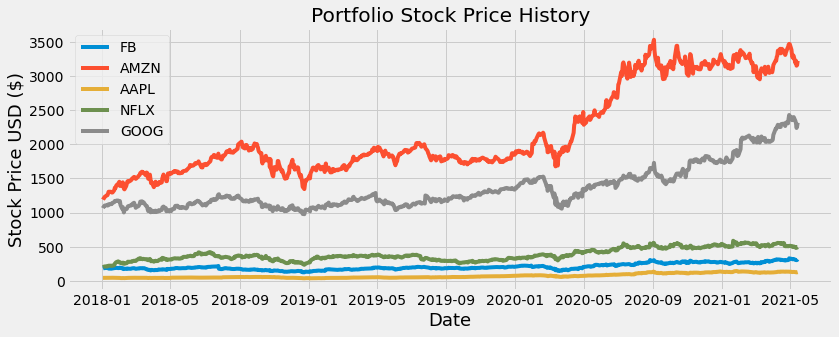

In [51]:
showGraph(stockSymbols)

In [41]:
my_stocks.set_index('Date', inplace=True)
my_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 848 entries, 2018-01-02 to 2021-05-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      848 non-null    float64
 1   AMZN    848 non-null    float64
 2   AAPL    848 non-null    float64
 3   NFLX    848 non-null    float64
 4   GOOG    848 non-null    float64
dtypes: float64(5)
memory usage: 39.8 KB


In [42]:
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.017914,0.012775,-0.000163,0.019794,0.016413
2018-01-04,-0.001841,0.004476,0.004645,0.002829,0.003621
2018-01-05,0.013671,0.016163,0.011374,0.021203,0.014571
2018-01-08,0.007653,0.014425,-0.003703,0.009810,0.004273
...,...,...,...,...,...
2021-05-10,-0.041087,-0.030721,-0.025804,-0.034039,-0.023775
2021-05-11,0.001830,0.010475,-0.007410,0.017239,-0.014050
2021-05-12,-0.012984,-0.022324,-0.024938,-0.020401,-0.030181


In [43]:
daily_simple_returns.corr()

,FB,AMZN,AAPL,NFLX,GOOG
FB,1.000000,0.636070,0.620998,0.503735,0.695613
AMZN,0.636070,1.000000,0.658779,0.667045,0.678576
AAPL,0.620998,0.658779,1.000000,0.504088,0.679014
NFLX,0.503735,0.667045,0.504088,1.000000,0.546654
GOOG,0.695613,0.678576,0.679014,0.546654,1.000000


In [44]:
daily_simple_returns.cov()

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.000558,0.000307,0.000320,0.000320,0.000317
AMZN,0.000307,0.000418,0.000294,0.000367,0.000268
AAPL,0.000320,0.000294,0.000477,0.000296,0.000286
NFLX,0.000320,0.000367,0.000296,0.000724,0.000284
GOOG,0.000317,0.000268,0.000286,0.000284,0.000373


In [45]:
daily_simple_returns.var()

FB      0.000558
AMZN    0.000418
AAPL    0.000477
NFLX    0.000724
GOOG    0.000373
dtype: float64

In [47]:
daily_simple_returns.std()

FB      0.023615
AMZN    0.020452
AAPL    0.021829
NFLX    0.026899
GOOG    0.019306
dtype: float64

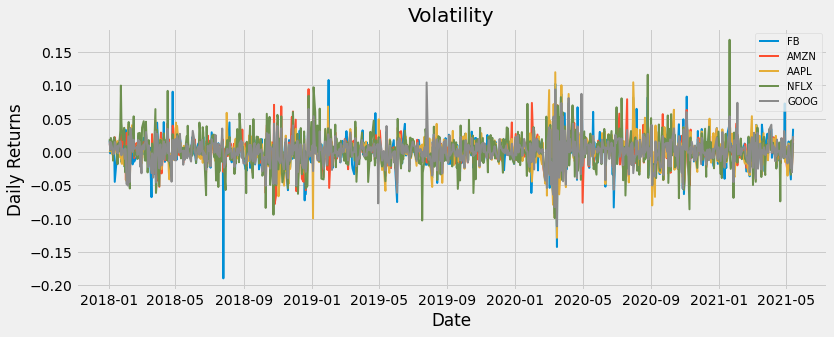

In [49]:
# Visualize the stocks daily simple returns / volatility 
plt.figure(figsize=(12,4.5)) #Set the figure size (width, height)
# Loop through each stock and plot the simple returns for each day
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)
# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.ylabel('Daily Returns') #Label the Y-axis simple returns
plt.xlabel('Date')
plt.show()